# Bayesian Regression
* `simi13` -- Bayesian Ridge Regression
* `simi14` -- Automatic Relevance Determination


In [1]:
# add path
import sys; import os; sys.path.append(os.path.realpath("../"))

# general hyperparameter optimization settings
from seasalt import (select_the_best, refit_model) 
from seasalt.si import (cv_settings, scorerfun, print_scores)
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# demo datasets
from datasets.demo2 import X_train, Y_train, fold_ids, X_valid, Y_valid, meta as meta_data
#meta_data

In [3]:
# model implementations
#from potpourri.simi13 import model, hyper, meta  # Bayesian Ridge Regression
from potpourri.simi14 import model, hyper, meta  # Automatic Relevance Determination
meta

{'id': 'simi14',
 'name': 'LinReg ARD',
 'descriptions': 'Automatic Relevance Determination',
 'solver': 'Evidence Maximization',
 'active': True,
 'keywords': ['linear regression',
  'univariate regression',
  'multiple regression',
  'bayesian regression',
  'maximum likelihood estimation',
  'automatic relevance determination',
  'sparse bayesian learning and relevance vector machine',
  'sklearn.linear_model.ARDRegression'],
 'output_num': 'single',
 'output_scale': 'interval',
 'output_dtype': 'float',
 'input_num': 'multi',
 'input_scale': 'interval',
 'input_dtype': 'float'}

## Train

In [4]:
%%time
rscv = RandomizedSearchCV(**{'estimator': model, 'param_distributions': hyper}, **cv_settings)
rscv.fit(X = X_train, y = Y_train)  # Run CV

bestparam, summary = select_the_best(rscv)  # find the "best" parameters
bestmodel = refit_model(model, bestparam, X_train, Y_train)  # Refit the "best" model

/Users/uh/cfs/venv-3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 3.03 s, sys: 455 ms, total: 3.49 s
Wall time: 43.6 s


In [5]:
#rscv.cv_results_

## Evaluate

In [6]:
print("\nout of sample score")
Y_pred = bestmodel.predict(X_valid)
print(scorerfun(Y_valid, Y_pred))

print("\nout of sample score (Other metrics)")
print_scores(bestmodel, Y_valid, X_valid)

print(bestparam)

print("\nin-sample scores and model variants (from CV)")
summary


out of sample score
0.4836020956302698

out of sample score (Other metrics)
  Explained Variance:       0.4861
                 MAE:      42.0456
                 MSE:    2787.6748
     Mean Sq Log Err:       0.1647
      Median Abs Err:      35.8435
                 R^2:       0.4836
{'lin__alpha_1': 0.007673952499523488, 'lin__alpha_2': 0.0009463915881162096, 'lin__lambda_1': 0.01803654794246297, 'lin__lambda_2': 0.003868202936673966, 'lin__threshold_lambda': 10}

in-sample scores and model variants (from CV)


,params,cvratio,rank_test_score,mean_test_score,std_test_score
35,"{'lin__alpha_1': 0.007673952499523488, 'lin__a...",3.855690,4,0.450293,0.116787
9,"{'lin__alpha_1': 0.02400432887393024, 'lin__al...",3.855439,1,0.450337,0.116806
0,"{'lin__alpha_1': 0.004692780899768591, 'lin__a...",3.854258,5,0.450287,0.116828
32,"{'lin__alpha_1': 0.0042323882487663765, 'lin__...",3.854010,3,0.450310,0.116842
3,"{'lin__alpha_1': 0.0020262142283225706, 'lin__...",3.852633,2,0.450313,0.116884


### Parameters

In [7]:
bestmodel.steps[1][1].coef_

array([ 0.00000000e+00, -1.01200101e+01,  2.76230245e+01,  1.78430488e+01,
       -4.42535022e+00, -2.07535024e-02, -1.41603389e+01,  1.97921155e-02,
        1.96846187e+01,  3.75815083e-02])

### Target vs Predicted

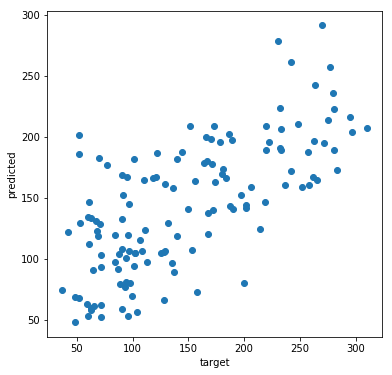

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(y=Y_pred, x=Y_valid);
#plt.scatter(x=np.log(Y_pred), y=np.log(Y_valid));
plt.xlabel('target');
plt.ylabel('predicted');

## Debug, Memory, Misc

In [9]:
#del summary
#locals()
%whos

Variable             Type                  Data/Info
----------------------------------------------------
RandomizedSearchCV   ABCMeta               <class 'sklearn.model_sel<...>arch.RandomizedSearchCV'>
X_train              ndarray               309x10: 3090 elems, type `float64`, 24720 bytes
X_valid              ndarray               133x10: 1330 elems, type `float64`, 10640 bytes
Y_pred               ndarray               133: 133 elems, type `float64`, 1064 bytes
Y_train              ndarray               309: 309 elems, type `float64`, 2472 bytes
Y_valid              ndarray               133: 133 elems, type `float64`, 1064 bytes
bestmodel            Pipeline              Pipeline(memory=None,\n  <...>n       verbose=False))])
bestparam            dict                  n=5
cv_settings          dict                  n=6
fold_ids             ndarray               309: 309 elems, type `int64`, 2472 bytes
hyper                dict                  n=5
meta                 dict      